In [3]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Exercise 1

#### 1. Function that generates random signal

In [59]:
import helper

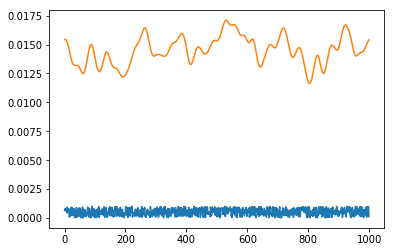

In [60]:
def generate_signal(num_steps, epsilon):
    return helper.gaussian_spectrum_1D(np.random.rand(num_steps), epsilon)

plt.plot(generate_signal(1000, 1.))
plt.plot(generate_signal(1000, 0.0001))

#### 2. Generate two signals

In [61]:
T = 1000
x1 = generate_signal(T, 1 / 30**2)
x2 = generate_signal(T, 1 / 100**2)

In [62]:
x1 = (x1 - np.mean(x1)) / np.std(x1)
x2 = (x2 - np.mean(x2)) / np.std(x2)
np.mean(x1), np.mean(x2), np.std(x1), np.std(x2)

(5.5422333389287814e-16,
 -1.1652900866465644e-15,
 0.99999999999999989,
 0.99999999999999989)

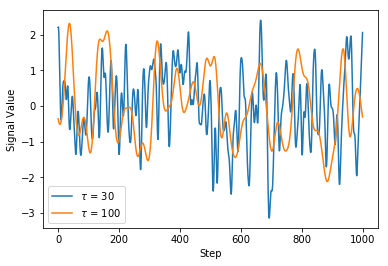

In [63]:
plt.plot(x1, label=r'$\tau$ = 30')
plt.plot(x2, label=r'$\tau$ = 100')
plt.xlabel('Step')
plt.ylabel('Signal Value')
plt.legend()

The signal with higher $\tau$ is smoother, i.e. it contains less high-frequency components.

#### 3. Linear SFA

In [64]:
X = np.vstack((x1, x2))
X.shape

(2, 1000)

In [65]:
C = np.cov(X)
C

array([[ 1.001001  ,  0.12078541],
       [ 0.12078541,  1.001001  ]])

In [66]:
X_dot = np.diff(X)
C_dot = np.dot(X_dot, X_dot.T) / (T - 1)
C_dot

array([[ 0.03968469, -0.00042646],
       [-0.00042646,  0.00474706]])

In [67]:
from scipy.linalg import eig

In [68]:
eigenvalues, eigenvectors = eig(C_dot, C)
for i in range(len(eigenvalues)):
    eigenvalue = eigenvalues[i]
    normalized_eigenvector = eigenvectors[:, i] / np.linalg.norm(eigenvectors[:, i])
    print('Eigenvalue: {} - Normalized Eigenvector: {}'.format(eigenvalue, normalized_eigenvector))

Eigenvalue: (0.0404334978809+0j) - Normalized Eigenvector: [-0.98913369  0.14701887]
Eigenvalue: (0.00471397961739+0j) - Normalized Eigenvector: [ 0.0284686   0.99959469]


#### 4. Mixing

The eigenvector with the smallest eigenvalue corresponds to the slowest SFA signal. Here, this eigenvector is almost (0, 1), i.e. the SFA signal contains almost only the second input signal ($x_2$). This makes sense because this is the slower input signal (higher $\tau$ value). Accordingly, the second SFA signal contains almost only the other input signal ($x_1$).

#### 5. Sample size

In [35]:
Ts = np.logspace(1, 4, 20).astype(int)
eigenvector_values = []

for T in Ts:
    x1 = generate_signal(T, 1 / 30**2)
    x2 = generate_signal(T, 1 / 100**2)
    
    x1 = (x1 - np.mean(x1)) / np.std(x1)
    x2 = (x2 - np.mean(x2)) / np.std(x2)

    X = np.vstack((x1, x2))
    C = np.cov(X)
    X_dot = np.diff(X)
    C_dot = np.dot(X_dot, X_dot.T) / (T - 1)
    
    eigenvalues, eigenvectors = eig(C_dot, C)
    ev1 = eigenvectors[:, 0] / np.linalg.norm(eigenvectors[:, 0])
    ev2 = eigenvectors[:, 1] / np.linalg.norm(eigenvectors[:, 1])
    
    eigenvector_values.append(np.hstack((ev1, ev2)))
    
eigenvector_values = np.array(eigenvector_values)

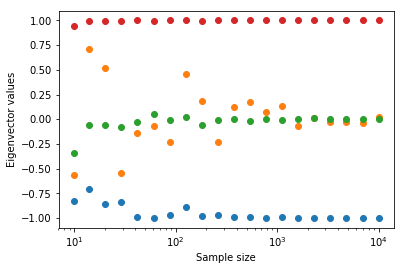

In [36]:
plt.plot(Ts, eigenvector_values, 'o')
plt.xscale('log')
plt.xlabel('Sample size')
plt.ylabel('Eigenvector values')

While three components of the two eigenvectors are stable with regards to the sample size, one of them is unstable for a small sample size and stabilizes around 0 for longer input signals. This may have to do with the fact, that low-frequency signals are not apparent if the sample size is too small.

# Exercise 2

#### 1. Generate image

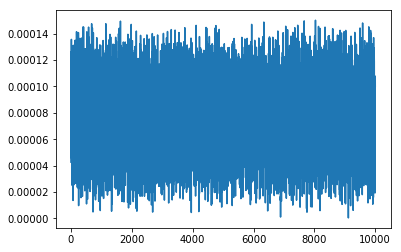

In [87]:
signal = generate_signal(10000, 0.04)
plt.plot(signal)

#### 2. Receptive field input

In [88]:
X = np.zeros((100, 9900))

In [89]:
for i in range(9900):
    X[:, i] = signal[i:i+100]

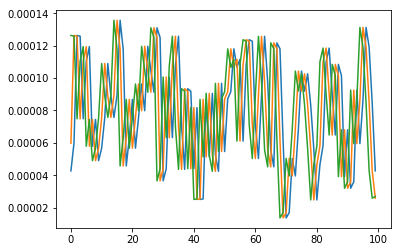

In [90]:
plt.plot(X[:, :3])

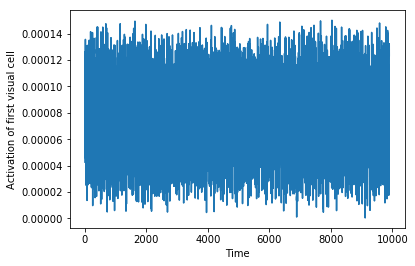

In [130]:
plt.plot(X[0])
plt.xlabel('Time')
plt.ylabel('Activation of first visual cell')

#### 3. SFA

In [91]:
C = np.cov(X)
C

array([[  9.35480704e-10,   4.29322537e-10,   1.90489903e-11, ...,
         -4.81914259e-12,  -2.45692894e-12,   6.00830468e-12],
       [  4.29322537e-10,   9.35391434e-10,   4.29180645e-10, ...,
         -5.43398151e-12,  -4.73289348e-12,  -2.37933218e-12],
       [  1.90489903e-11,   4.29180645e-10,   9.35599709e-10, ...,
         -1.27166013e-11,  -5.18928783e-12,  -4.86433779e-12],
       ..., 
       [ -4.81914259e-12,  -5.43398151e-12,  -1.27166013e-11, ...,
          9.36543567e-10,   4.32244078e-10,   2.14106652e-11],
       [ -2.45692894e-12,  -4.73289348e-12,  -5.18928783e-12, ...,
          4.32244078e-10,   9.36486925e-10,   4.32105911e-10],
       [  6.00830468e-12,  -2.37933218e-12,  -4.86433779e-12, ...,
          2.14106652e-11,   4.32105911e-10,   9.36569113e-10]])

In [92]:
X_dot = np.diff(X)
C_dot = np.dot(X_dot, X_dot.T) / (T - 1)
C_dot

array([[  1.00291851e-08,  -9.52576259e-10,  -3.90086284e-09, ...,
         -1.68609167e-11,  -5.86412373e-11,   3.77145912e-11],
       [ -9.52576259e-10,   1.00297730e-08,  -9.51773334e-10, ...,
          6.67573297e-11,  -1.58703033e-11,  -5.98418452e-11],
       [ -3.90086284e-09,  -9.51773334e-10,   1.00296242e-08, ...,
         -4.53334182e-11,   6.99354914e-11,  -1.73087405e-11],
       ..., 
       [ -1.68609167e-11,   6.67573297e-11,  -4.53334182e-11, ...,
          9.99337260e-09,  -9.26082403e-10,  -3.89004018e-09],
       [ -5.86412373e-11,  -1.58703033e-11,   6.99354914e-11, ...,
         -9.26082403e-10,   9.99236677e-09,  -9.28400531e-10],
       [  3.77145912e-11,  -5.98418452e-11,  -1.73087405e-11, ...,
         -3.89004018e-09,  -9.28400531e-10,   9.99478615e-09]])

In [93]:
eigenvalues, eigenvectors = eig(C_dot, C)

#### 4. Sorting

In [114]:
indices_for_sorting = np.argsort(eigenvalues)
sorted_eigenvectors = eigenvectors.T[indices_for_sorting].T

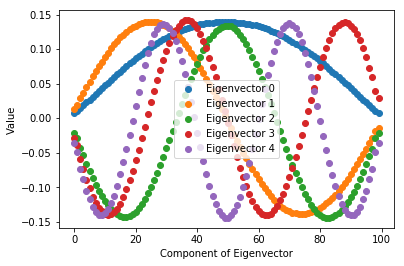

In [140]:
for i in range(5):
    plt.plot(eigenvectors[:, i], 'o', label='Eigenvector {}'.format(i))
plt.xlabel('Component of Eigenvector')
plt.ylabel('Value')
plt.legend()

#### 5. Discussion

The values of the eigenvector components have a sinusoidal shape. Eigenvectors corresponding to slower SFA components have lower frequency. 

#### 6. Projection on SFA-basis

In [137]:
Y = np.dot(eigenvectors.T, X)
Y.shape

(100, 9900)

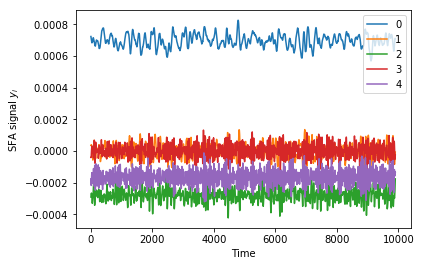

In [138]:
for i in range(5):
    plt.plot(Y[i], label=i)
plt.xlabel('Time')
plt.ylabel('SFA signal $y_i$')
plt.legend()

Even though the first SFA signal changes more slowly than the original input signals, it should have actually been a slower and more gradual change (considering the slow shift of the input through the receptive field). Apparently, the SFA did not succeed.